In [7]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline 

In [17]:
import pandas_datareader.data as web

In [10]:
from datetime import datetime

In [12]:
tech_list=["AAPL","GOOG","MSFT","AMZN"]

In [14]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [18]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,"yahoo",start,end) #

In [19]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   190.761071  186.944564  188.856429  188.810556  3.428855e+07   
std     20.806029   20.670057   20.726245   20.828972  1.502657e+07   
min    145.720001  142.000000  143.979996  142.190002  1.251390e+07   
25%    174.917500  171.912506  173.347504  173.020000  2.356790e+07   
50%    187.349998  184.845001  186.204994  185.955002  3.169850e+07   
75%    209.312500  205.632496  207.299999  207.645000  4.083252e+07   
max    233.470001  229.779999  230.779999  232.070007  9.624670e+07   

        Adj Close  
count  252.000000  
mean   187.560522  
std     21.090282  
min    142.190002  
25%    171.319050  
50%    184.916672  
75%    206.771034  
max    231.263092

In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-01-03 to 2019-01-03
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


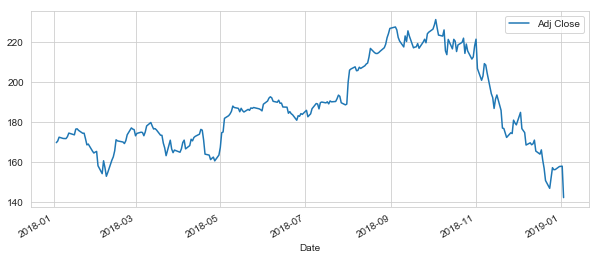

In [22]:
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

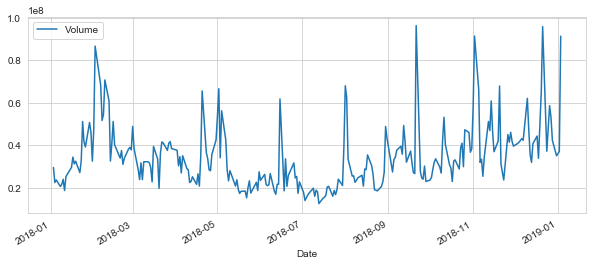

In [23]:
AAPL["Volume"].plot(legend=True,figsize=(10,4))

In [26]:
ma_day=[10,20,50]
for ma in ma_day:
    columns_name="MA{}".format(ma)
    #AAPL[columns_name]=pd.rolling_mean(AAPL["Adj Close"],ma)
    AAPL[columns_name]=AAPL["Adj Close"].rolling(ma).mean()

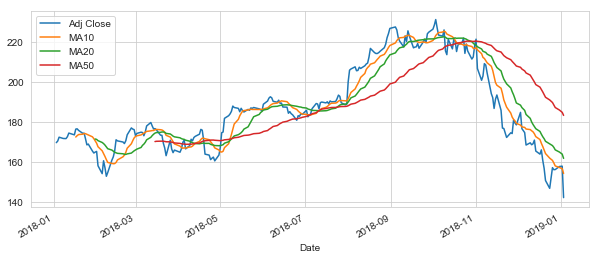

In [28]:
AAPL[["Adj Close","MA10","MA20", "MA50"]].plot(subplots=False,figsize=(10,4))

In [29]:
AAPL["Daily Return"]=AAPL["Adj Close"].pct_change() #percent change 何%変化したか

In [30]:
AAPL.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-01-03  174.550003  171.960007  172.529999  172.229996  29517900.0   
2018-01-04  173.470001  172.080002  172.539993  173.029999  22434600.0   
2018-01-05  175.369995  173.050003  173.440002  175.000000  23660000.0   
2018-01-08  175.610001  173.929993  174.350006  174.350006  20567800.0   
2018-01-09  175.059998  173.410004  174.550003  174.330002  21584000.0   

             Adj Close  MA10  MA20  MA50  Daily Return  
Date                                                    
2018-01-03  169.682510   NaN   NaN   NaN           NaN  
2018-01-04  170.470703   NaN   NaN   NaN      0.004645  
2018-01-05  172.411560   NaN   NaN   NaN      0.011385  
2018-01-08  171.771179   NaN   NaN   NaN     -0.003714  
2018-01-09  171.751465   NaN   NaN   NaN     -0.000115

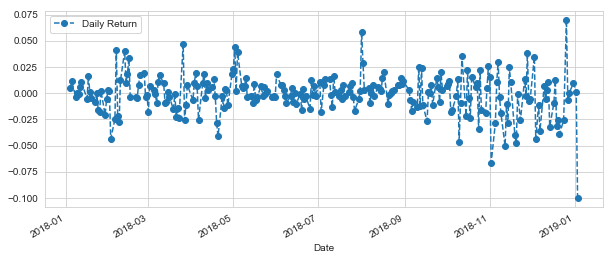

In [32]:
AAPL["Daily Return"].plot(legend=True,linestyle="--",marker="o",figsize=(10,4))

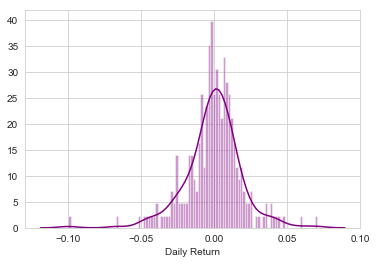

In [34]:
sns.distplot(AAPL["Daily Return"].dropna(),bins=100,color="purple") #初日をdropnaで取り除く

In [35]:
closing_df=web.DataReader(["AAPL","GOOG", "MSFT", "AMZN"],"yahoo",start, end)["Adj Close"]

In [36]:
closing_df.head()

Symbols           AAPL         AMZN         GOOG       MSFT
Date                                                       
2018-01-03  169.682510  1204.199951  1082.479980  84.880608
2018-01-04  170.470703  1209.589966  1086.400024  85.627678
2018-01-05  172.411560  1229.140015  1102.229980  86.689301
2018-01-08  171.771179  1246.869995  1106.939941  86.777763
2018-01-09  171.751465  1252.699951  1106.260010  86.718788

In [37]:
tech_rets=closing_df.pct_change()

In [38]:
tech_rets.head()

Symbols         AAPL      AMZN      GOOG      MSFT
Date                                              
2018-01-03       NaN       NaN       NaN       NaN
2018-01-04  0.004645  0.004476  0.003621  0.008801
2018-01-05  0.011385  0.016163  0.014571  0.012398
2018-01-08 -0.003714  0.014425  0.004273  0.001020
2018-01-09 -0.000115  0.004676 -0.000614 -0.000680

C:\Users\tetsu\Anaconda3\envs\tf111gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


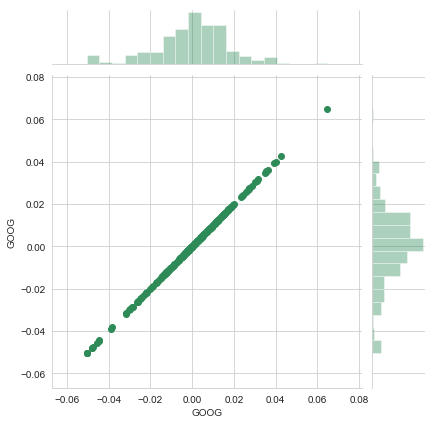

In [39]:
sns.jointplot("GOOG","GOOG",tech_rets,kind="scatter",color="seagreen")

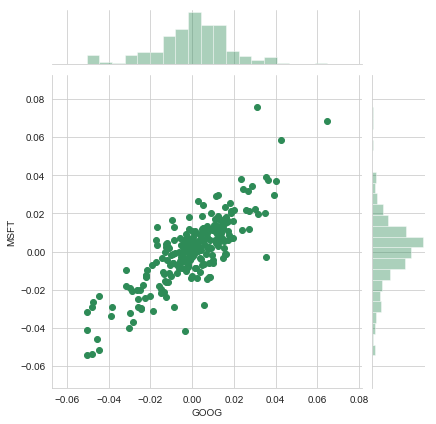

In [48]:
sns.jointplot("GOOG","MSFT",tech_rets,kind="scatter",color="seagreen")

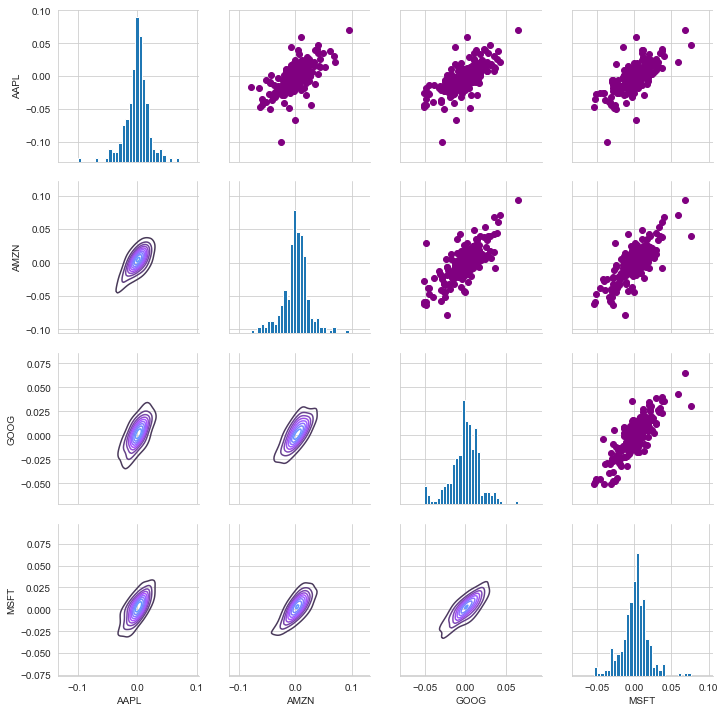

In [44]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color="purple")
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")
returns_fig.map_diag(plt.hist,bins=30)

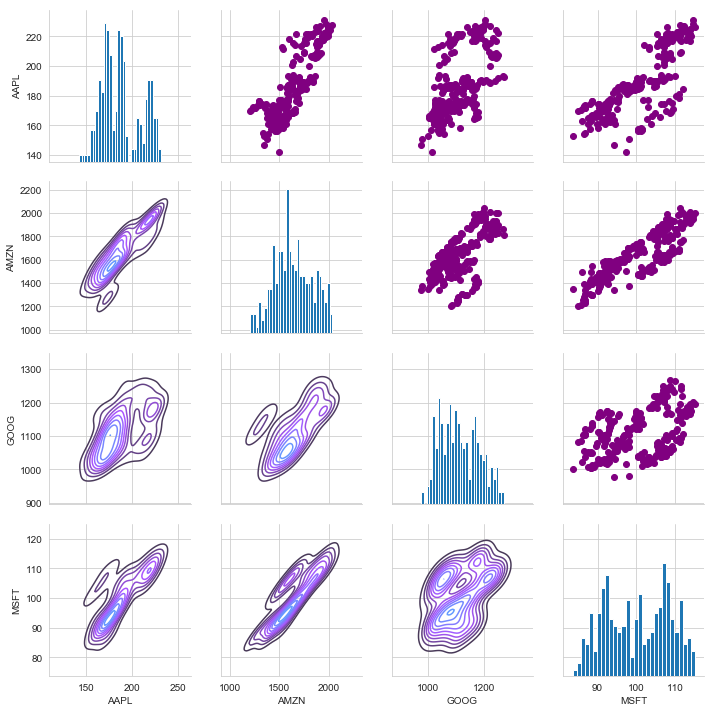

In [45]:
returns_fig=sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color="purple")
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")
returns_fig.map_diag(plt.hist,bins=30)

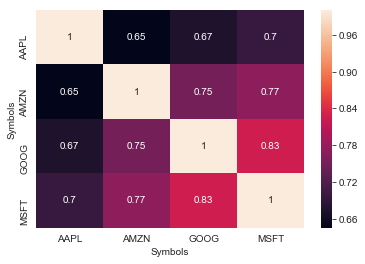

In [46]:
sns.heatmap(tech_rets.corr(),annot=True)

In [49]:
rets=tech_rets.dropna()

In [50]:
rets.head()

Symbols         AAPL      AMZN      GOOG      MSFT
Date                                              
2018-01-04  0.004645  0.004476  0.003621  0.008801
2018-01-05  0.011385  0.016163  0.014571  0.012398
2018-01-08 -0.003714  0.014425  0.004273  0.001020
2018-01-09 -0.000115  0.004676 -0.000614 -0.000680
2018-01-10 -0.000229  0.001301 -0.003299 -0.004534

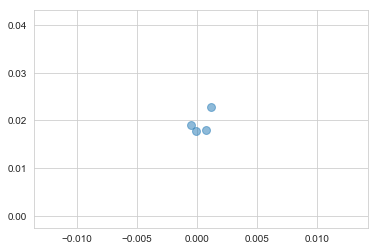

In [51]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=np.pi*20)


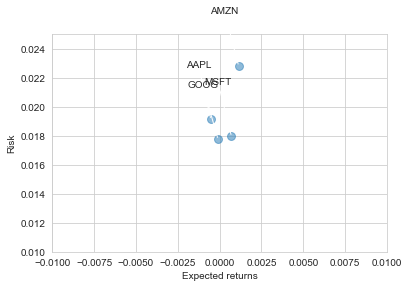

In [58]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=np.pi*20)
plt.ylim([0.01,0.025])
plt.xlim([-0.01,0.01])

plt.xlabel("Expected returns")
plt.ylabel("Risk")

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(0,50),
                 textcoords="offset points",ha="right",va="bottom",
                 arrowprops=dict(arrowstyle="-",connectionstyle="arc3"))

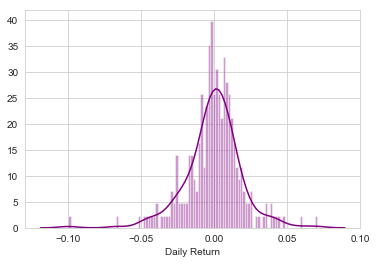

In [59]:
sns.distplot(AAPL["Daily Return"].dropna(),bins=100,color="purple")

In [60]:
rets["AAPL"].quantile(0.05) #ヒストグラムの左から5%を評価

-0.03159469020707206

In [62]:
#ブラウン運動モデル
#モンテカルロ法
days = 365
dt =1/days
mu = rets.mean()["GOOG"]
sigma=rets.std()["GOOG"]


In [70]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0] = start_price
    shock= np.zeros(days)
    drift =np.zeros(days)
    
    for x in range(1,days):
        shock[x]= np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [71]:
GOOG.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2018-01-03  1086.290039  1063.209961  1064.310059  1082.479980  1430200   
2018-01-04  1093.569946  1084.001953  1088.000000  1086.400024  1004600   
2018-01-05  1104.250000  1092.000000  1094.000000  1102.229980  1279100   
2018-01-08  1111.270020  1101.619995  1102.229980  1106.939941  1047600   
2018-01-09  1110.569946  1101.230957  1109.400024  1106.260010   902500   

              Adj Close  
Date                     
2018-01-03  1082.479980  
2018-01-04  1086.400024  
2018-01-05  1102.229980  
2018-01-08  1106.939941  
2018-01-09  1106.260010

Text(0.5, 1.0, 'Monte Carlo Analysis')

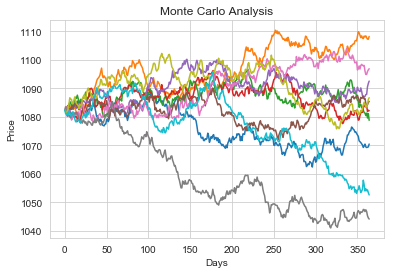

In [74]:
start_price=GOOG.iloc[0,5]

for run in range(10):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis")

In [76]:
runs = 10000
simulations=np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([1009.96284789, 1010.65930388, 1011.35575987, ..., 1147.8611342 ,
        1148.55759019, 1149.25404619]),
 <a list of 200 Patch objects>)

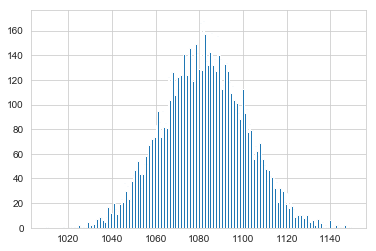

In [77]:
plt.hist(simulations,bins=200)

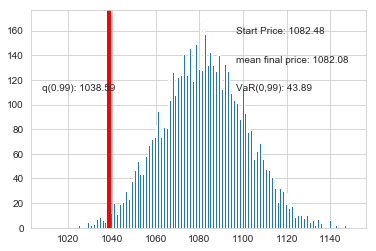

In [78]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start Price: {:0.2f}".format(start_price))
plt.figtext(0.6,0.7,"mean final price: {:0.2f}".format(simulations.mean()))
plt.figtext(0.6,0.6,"VaR(0,99): {:0.2f}".format(start_price-q))
plt.figtext(0.15,0.6,"q(0.99): {:0.2f}".format(q))

plt.axvline(x=q,linewidth=4,color="r")

In [ ]:
#99%の確立で43.89ドル損することはない